
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-48.32,-75.42,26.00,-23.07,18.84,43.35,28.46,55.15,-23.07,-1272.31
1,AAL,American Airlines Group,US Stocks:Industrials,-89.61,-14.43,-7.66,-4.82,-9.10,26.28,22.06,41.99,-4.82,-202.39
2,AAON,AAON,US Stocks:Industrials,-98.72,-90.27,-10.19,27.35,17.42,84.81,79.19,43.97,27.35,0.62
3,ACHC,Acadia Healthcare,US Stocks:Healthcare,-98.92,-68.41,-65.69,-17.05,-1.51,92.20,86.98,41.88,-17.05,-714.05
4,ACM,AECOM,US Stocks:Industrials,-41.36,-45.80,12.98,13.23,16.01,25.83,13.50,22.70,13.23,0.58
5,ADC,Agree Realty,US Stocks:Real Estate,49.56,-7.99,38.37,10.52,3.61,13.95,7.98,18.24,10.52,0.58
6,AFG,American Financial Group,US Stocks:Financials,-63.68,-47.24,5.06,6.48,15.45,26.08,21.65,22.63,6.48,0.29
7,AGCO,AGCO,US Stocks:Industrials,-54.52,-14.11,-6.67,-1.95,12.39,39.37,23.68,35.11,-1.95,-68.46
8,AIT,Applied Industrial Technologies,US Stocks:Industrials,-15.07,-34.05,33.62,38.93,33.13,30.39,23.98,26.52,38.93,1.47
9,ALE,ALLETE,US Stocks:Utilities,21.65,9.07,21.19,7.73,1.08,4.16,2.42,21.45,7.73,0.36


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
258,OGE,OGE Energy,US Stocks:Utilities,212.30,29.23,45.47,14.32,5.90,13.01,4.49,18.75,14.32,0.76
98,CVLT,CommVault Systems,US Stocks:Technology,504.09,-11.00,79.95,41.05,30.34,38.20,26.84,29.18,41.05,1.41
260,OHI,Omega Healthcare Investors,US Stocks:Real Estate,54.37,-23.42,26.90,19.85,5.00,21.63,9.87,24.44,19.85,0.81
93,CRS,Carpenter Technology,US Stocks:Materials,-11.10,27.43,220.51,81.21,41.53,47.38,22.74,47.93,81.21,1.69
118,EME,Emcor,US Stocks:Industrials,-57.82,-58.91,47.73,53.29,38.96,41.87,26.44,32.65,53.29,1.63
214,LNTH,Lantheus Holdings,US Stocks:Healthcare,18.07,13.18,37.45,48.14,41.24,69.94,24.60,45.39,48.14,1.06
362,UNM,Unum,US Stocks:Financials,111.84,39.00,71.86,47.85,31.48,26.34,9.00,28.39,47.85,1.69
15,AM,Antero Midstream,US Stocks:Energy,158.54,44.61,36.74,31.46,45.45,32.34,10.16,23.79,31.46,1.32
319,SFM,Sprouts Farmers Market,US Stocks:Consumer Staples,-41.18,1.14,143.52,72.96,54.70,69.46,56.47,34.04,72.96,2.14
239,MUSA,Murphy USA,US Stocks:Consumer Discretionary,-45.14,-47.28,13.76,38.32,36.93,31.59,21.13,26.55,38.32,1.44


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,OGE,CVLT,OHI,CRS,EME,LNTH,UNM,AM,SFM,MUSA,TKO,Ranked Portfolio
Annual Returns,14.32,41.05,19.85,81.21,53.29,48.14,47.85,31.46,72.96,38.32,40.00,34.31
Std Dev,18.75,29.18,24.44,47.93,32.65,45.39,28.39,23.79,34.04,26.55,29.46,18.77
Sharpe Ratio,0.76,1.41,0.81,1.69,1.63,1.06,1.69,1.32,2.14,1.44,1.36,1.83
Weight,0.28,0.05,0.13,0.06,0.05,0.05,0.14,0.12,0.02,0.06,0.05,1.00
Worst Typical Down Year,-23.18,-17.31,-29.03,-14.65,-12.01,-42.64,-8.93,-16.12,4.88,-14.78,-18.92,-3.23
Black Swan,-41.93,-46.49,-53.47,-62.58,-44.66,-88.03,-37.32,-39.91,-29.16,-41.33,-48.38,-22.00


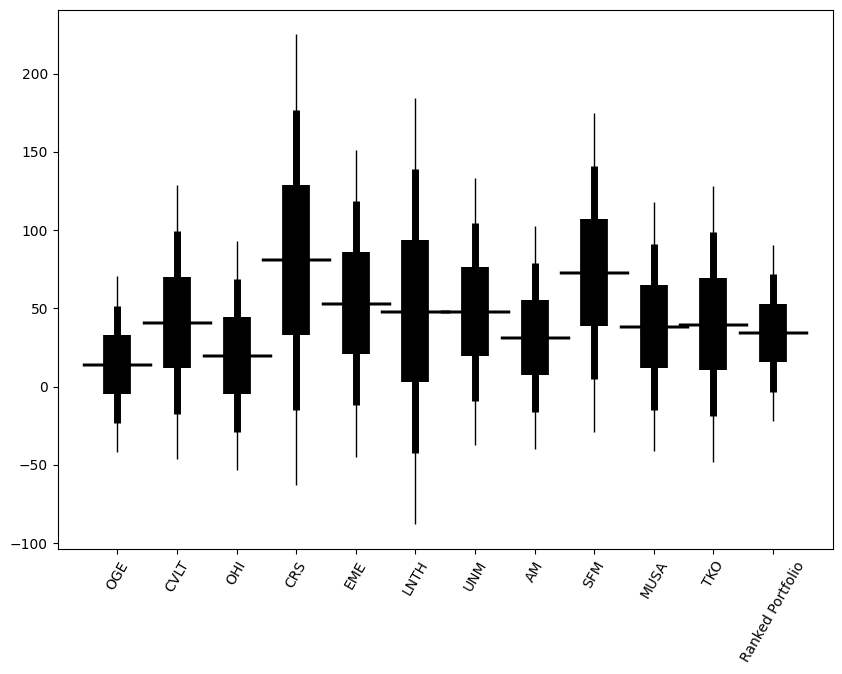

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

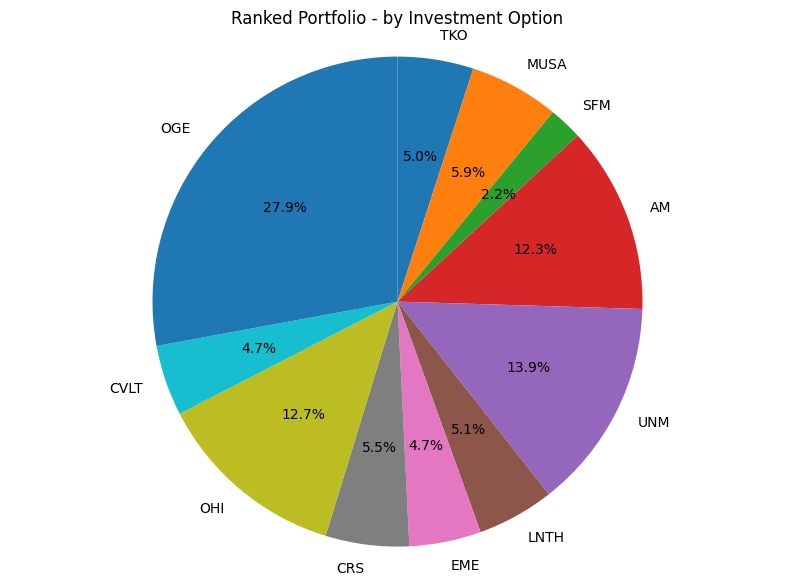

TKO    0.05
MUSA   0.06
SFM    0.02
AM     0.12
UNM    0.14
LNTH   0.05
EME    0.05
CRS    0.06
OHI    0.13
CVLT   0.05
OGE    0.28



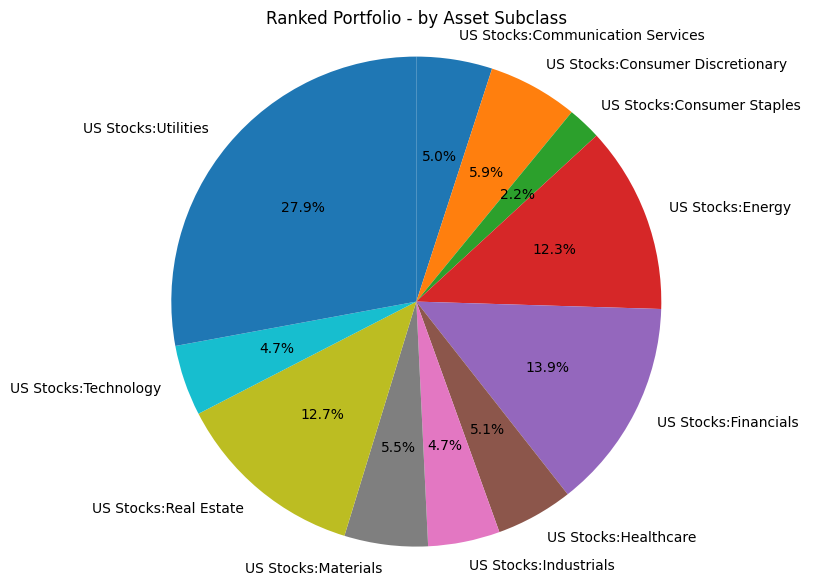

US Stocks:Communication Services   0.05
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.02
US Stocks:Energy                   0.12
US Stocks:Financials               0.14
US Stocks:Healthcare               0.05
US Stocks:Industrials              0.05
US Stocks:Materials                0.06
US Stocks:Real Estate              0.13
US Stocks:Technology               0.05
US Stocks:Utilities                0.28



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    OGE                            0.2790
    CVLT                           0.0467
    OHI                            0.1269
    CRS                            0.0551
    EME                            0.0474
    LNTH                           0.0509
    UNM                            0.1392
    AM                             0.1233
    SFM                            0.0222
    MUSA                           0.0593
    TKO                            0.0500


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).